In [44]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

* world_rank - world rank for the university. Contains rank ranges and equal ranks (eg. =94 and 201-250)
* university_name - name of university
* country - country of each university
* teaching - university score for teaching (the learning environment)
* international - university score international outlook (staff, students, research)
* research - university score for research (volume, income and reputation)
* citations - university score for citations (research influence)
* income - university score for industry income (knowledge transfer)
* total_score - total score for university, used to determine rank
* num_students - number of students at the university

In [2]:
df = pd.read_csv('dataset/timesData.csv')
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [60]:
df.world_rank.unique()

array(['1', '2', '3', '4', '5', '6', '8', '9', '10', '11', '12', '13',
       '14', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '47', '48', '49', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '63', '64',
       '65', '66', '67', '68', '71', '72', '73', '75', '76', '77', '78',
       '79', '81', '83', '85', '86', '87', '88', '89', '90', '93', '94',
       '95', '98', '99', '100', '101', '102', '103', '104', '105', '106',
       '107', '109', '111', '112', '114', '115', '117', '118', '119',
       '120', '122', '124', '127', '128', '129', '130', '132', '135',
       '136', '137', '138', '139', '140', '142', '143', '144', '145',
       '147', '149', '151', '152', '155', '156', '158', '159', '161',
       '163', '164', '165', '167', '168', '170', '171', '172', '173',
       '174', '177', '178', '181', '182', '183', '184', '185', '186

In [3]:
df.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


In [4]:
university = df.groupby('year').count()[['university_name']].reset_index()
university

,year,university_name
0,2011,200
1,2012,402
2,2013,400
3,2014,400
4,2015,401
5,2016,800


In [5]:
df['num_students'] = df['num_students'].str.replace(',', '')
df['num_students'] = df['num_students'].fillna(0)
df['num_students'] = df['num_students'].astype(str).astype(int)
df['num_students'] = df['num_students'].replace(0, round(np.mean(df.num_students),0))

df.num_students.unique()

array([ 20152,   2243,  11074,  15596,   7929,  18812,  19919,  36186,
        15060,  11751,  38206,  14221,  15128,  21424,  18178,  41786,
        66198,  25055,  20376,  11885,  19835,  26607,  44020,  15172,
        18334,  26199,  19967,   3055,  22020,  50152,  26518,  27233,
        42727,  31592,  31326,  40128,  40148,  12528,   2429,  25774,
        11385,   2400,  14604,   7774,  25581,  23333,   6333,   9666,
        26614,  14290,  12161,  46825,  10410,  35364,   8653,  56959,
        22809,  39763,  24789,  42056,  12338,  35691,  11829,  26485,
         9259,  51462,  29325,  17906,  17404,   6753,  41868,  23845,
        20771,  36534,   7867,  15521,  21394,  21908,   9027,  12001,
        34718,  28881,  25674,  15489,  34938,   8747,  28251,  20925,
        26583,   7326,  23823,  22193,  20541,  36429,  12551,  31331,
         6178,   2218,  35565,  23505,   8338,   6671,  37032,  39256,
        10221,  20040,  44501,  26389,  10441,   9586,   8176,  31891,
      

In [6]:
df['international'] = df['international'].str.replace('-', '0.0')
df['international'] = df['international'].astype(str).astype(float)
df['international'] = df['international'].replace(0.0, round(np.mean(df.international),1))

df.international.unique()

array([ 72.4,  54.6,  82.3,  29.5,  70.3,  77.7,  77.2,  39.6,  90. ,
        59.2,  48.1,  62.8,  58.5,  62.4,  93.7,  53.3,  51.8,  90.9,
        32.9,  39.1,  91.4,  90.8,  49. ,  49.4,  60.5,  18.4,  73.2,
        32.6,  64.3,  93.3,  21.5,  31.6,  55.9,  97.8,  85.9,  88. ,
        68.6,  56.4,  77.9,  67.3,  97.4,  44.9,  93.9,  44.5,  43.7,
        31.2, 100. ,  66.3,  22.1,  23. ,  28.3,  22.6,  43. ,  38.1,
        31.8,  52.3,  43.1,  35.6,  25.2,  56.5,  64. ,  31.7,  67.2,
        16.7,  89.6,  42.2,  87.5,  20.9,  84.2,  52.2,  36.7,  72.8,
        74.2,  66.6,  63.4,  22.5,  65.7,  99.5,  79.1,  92.9,  56.8,
        69. ,  87.9,  24.4,  87. ,  21.9,  91.3,  35.4,  31. ,  37.6,
        85.3,  24.2,  85.7,  48. ,  26.8,  62.6,  34.1,  83.3,  19.9,
        71.8,  47.7,  24.8,  29.2,  34.2,  63. ,  95.7,  29.6,  50.2,
        91. ,  30.4,  24.7,  73.8,  40. ,  71.6,  55.1,  20.1,  46.2,
        84.1,  62.7,  30.6,  30.7,  54.4,  22.3,  52.6,  24.3,  94.3,
        19.3,  82.9,

In [7]:
df['international_students'] = df['international_students'].str.replace('%', '')
df['international_students'] = df['international_students'].fillna(0)
df['international_students'] = df['international_students'].astype(str).astype(int) / 100
df['international_students'] = df['international_students'].replace(0.0, round(np.mean(df.international),1))

df.international.unique()

array([ 72.4,  54.6,  82.3,  29.5,  70.3,  77.7,  77.2,  39.6,  90. ,
        59.2,  48.1,  62.8,  58.5,  62.4,  93.7,  53.3,  51.8,  90.9,
        32.9,  39.1,  91.4,  90.8,  49. ,  49.4,  60.5,  18.4,  73.2,
        32.6,  64.3,  93.3,  21.5,  31.6,  55.9,  97.8,  85.9,  88. ,
        68.6,  56.4,  77.9,  67.3,  97.4,  44.9,  93.9,  44.5,  43.7,
        31.2, 100. ,  66.3,  22.1,  23. ,  28.3,  22.6,  43. ,  38.1,
        31.8,  52.3,  43.1,  35.6,  25.2,  56.5,  64. ,  31.7,  67.2,
        16.7,  89.6,  42.2,  87.5,  20.9,  84.2,  52.2,  36.7,  72.8,
        74.2,  66.6,  63.4,  22.5,  65.7,  99.5,  79.1,  92.9,  56.8,
        69. ,  87.9,  24.4,  87. ,  21.9,  91.3,  35.4,  31. ,  37.6,
        85.3,  24.2,  85.7,  48. ,  26.8,  62.6,  34.1,  83.3,  19.9,
        71.8,  47.7,  24.8,  29.2,  34.2,  63. ,  95.7,  29.6,  50.2,
        91. ,  30.4,  24.7,  73.8,  40. ,  71.6,  55.1,  20.1,  46.2,
        84.1,  62.7,  30.6,  30.7,  54.4,  22.3,  52.6,  24.3,  94.3,
        19.3,  82.9,

In [8]:
df['income'] = df['income'].str.replace('-', '0.0')
df['income'] = df['income'].astype(str).astype(float)
df['income'] = df['income'].replace(0.0, round(np.mean(df.income),0))

df.income.unique()

array([ 34.5,  83.7,  87.5,  64.3,  45. ,  57. ,  73.5,  92.9, 100. ,
        34.7,  59.6,  43.7,  53.7,  56.5,  39. ,  32.8,  95.1,  89.8,
        42.6,  50.2,  51.8,  40.5,  47.7,  98.6,  42.2,  64.1,  30.7,
        73.3,  31.7,  29.2,  38. ,  30.3,  84.2,  48. ,  53.9,  67.1,
        97.8,  29.6,  40.4,  37.9,  36.2,  90.8,  52.7,  31.6,  44.1,
        29.1,  57.1,  39.1,  33.9,  38.4,  30.5,  33.2,  37.7,  43.8,
        45.8,  26.1,  30.2,  32.6,  44. ,  43. ,  26.7,  32.4,  60.5,
        99.8,  35.7,  32.7,  97.7,  43.4,  38.9,  95.5,  97.1,  28.8,
        44.5,  61. ,  73.4,  27.4,  82.3,  79.8,  41.5,  42.5,  40.3,
        81.4,  26.4,  49.3,  30. ,  55.3,  61.1,  34.8,  36. ,  39.5,
        57.2,  47. ,  99.4,  31.1,  60. ,  40. ,  49.6,  50.1,  37.5,
        38.8,  40.6,  61.5,  38.3,  34.2,  41.2,  41.6,  29.7,  27.8,
        40.8,  29.4,  98.7,  56.6,  43.9,  32.2,  49.8,  35. ,  32.3,
        32.5,  27. ,  26.3,  70.3,  99.9,  97. ,  35.9,  63.8,  62.1,
        81. ,  55.5,

In [9]:
df['student_staff_ratio'] = df['student_staff_ratio'].fillna(0)
df['student_staff_ratio'] = df['student_staff_ratio'].astype(str).astype(float)
df['student_staff_ratio'] = df['student_staff_ratio'].replace(0.0, round(np.mean(df.student_staff_ratio),0))

df.student_staff_ratio.unique()

array([  8.9,   6.9,   9. ,   7.8,   8.4,  11.8,  11.6,  16.4,  11.7,
         4.4,  10.3,   3.6,  10.2,  14.7,  19.5,   5.9,   6.5,  13.1,
        17.6,  10.7,   4.8,  13.8,   5.7,  20.1,  10.1,  27.3,   7.3,
        18.7,  15.5,  13.7,  23.7,   8.3,  14.1,  23.8,   7.9,  19.2,
        11.5,  25.6,  18. ,  10.5,  16.1,  10. ,  13.9,  13. ,   5.6,
         8.6,   6.8,   4.5,   5.8,   6.4,  13.4,  14. ,  22.7,   5.5,
        20.2,  30.1,  12.9,  11.4,  10.9,  17.4,  32.7,  24.5,  16.9,
        15.7,  15.3,  15.9,  13.5,   4.6,  19.3,  12. ,  12.7,  17.3,
         6.6,   8. ,  31.5,  15.1,  15. ,  18.1,  12.1,  12.4,  11. ,
        16. ,  11.9,  22. ,  41.9,  13.3,   5. ,  34.1,  14.9,  17.1,
        21.6,  21.5,  31.2,  11.1,  20.3,  16.3,   8.7,  12.2,  15.4,
        17. ,  18.9,  23.3,  18.2,  25.9,  15.8,  19.4,  17.2,  15.2,
        18.3,  13.6,  29.9,  19.6,   8.5,  14.4,  38.4,  16.6,   9.3,
        67.8,  16.2,   4.1,  52.5,  40.5,  70.4,  27.6,  22.2,  18.8,
        59.1,  24.6,

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   float64
 8   total_score             2603 non-null   object 
 9   num_students            2603 non-null   int64  
 10  student_staff_ratio     2603 non-null   float64
 11  international_students  2603 non-null   float64
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(7), int64(2), object(5)
memor

In [11]:
df.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students                0
student_staff_ratio         0
international_students      0
female_male_ratio         233
year                        0
dtype: int64

/var/folders/wm/yj20p_cn5cd7_yb59k7dzks40000gn/T/ipykernel_11362/3770598804.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin = -1, annot= True)


<Axes: >

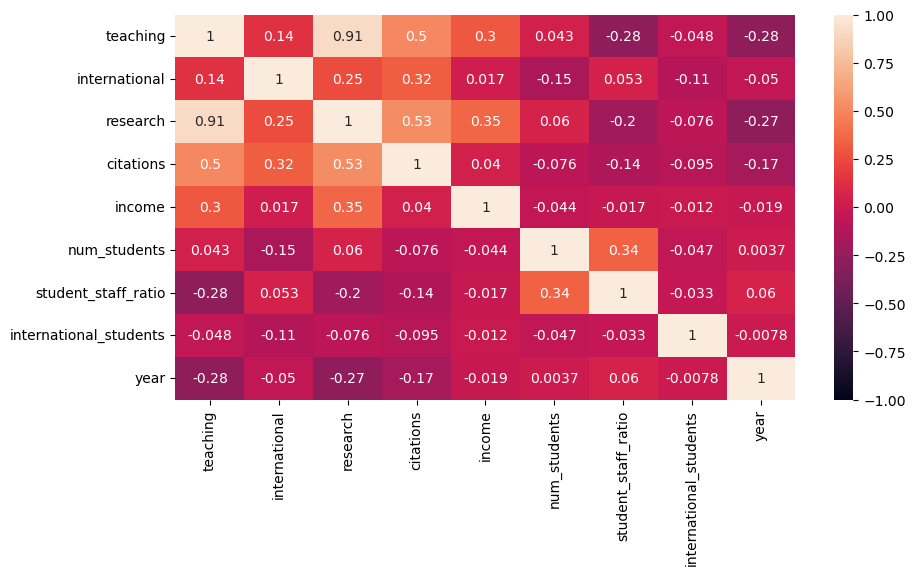

In [12]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(df.corr(), vmin = -1, annot= True)
#зависимость между качеством преподавания и оценкой университета

In [13]:
filter_df = df[df['country'] == 'Unisted States of America']
filter_df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2019,201-250,University of Hawai’i at Mānoa,Unisted States of America,32.0,63.4,35.5,67.7,44.7,-,23333,18.0,52.0,NaN,2016


Text(0.5, 0.98, 'Number of universities ranked over the years')

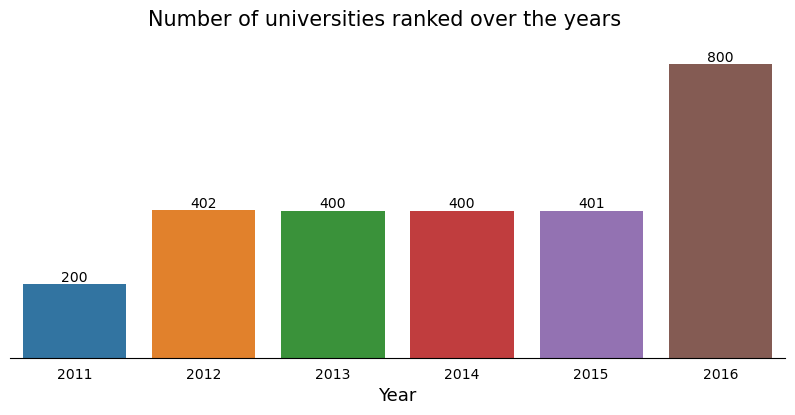

In [14]:
year_df = df['year'].value_counts().sort_values()
fig, ax = plt.subplots(figsize = (10,4))
ax.spines['top'].set_visible(False) # убираем границы
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(bottom = False)
ax.get_yaxis().set_visible(False)

sns.countplot(data = df, x = 'year')

ax.bar_label(ax.containers[0])

ax.set_xlabel('Year', fontsize = 13, color = 'black')
fig.suptitle('Number of universities ranked over the years', fontsize = 15, color = 'black')

In [15]:
list_of_country = list(df.country.unique()) # есть некорректное название страны Unisted States of America

unreal_name_country = "Unisted States of America"
if unreal_name_country in list_of_country: list_of_country.remove(unreal_name_country) # there is no country like "Unisted States of america". 
                                                                                        # This might have written wrongly ,anyway we delete this.

list_of_country

['United States of America',
 'United Kingdom',
 'Switzerland',
 'Canada',
 'Hong Kong',
 'Japan',
 'South Korea',
 'Singapore',
 'Australia',
 'China',
 'France',
 'Sweden',
 'Germany',
 'Republic of Ireland',
 'Finland',
 'Taiwan',
 'South Africa',
 'Turkey',
 'Netherlands',
 'Belgium',
 'Denmark',
 'Norway',
 'Spain',
 'New Zealand',
 'Egypt',
 'Austria',
 'Israel',
 'Brazil',
 'Italy',
 'Russian Federation',
 'Greece',
 'Iceland',
 'Czech Republic',
 'India',
 'Poland',
 'Iran',
 'Portugal',
 'Thailand',
 'Chile',
 'Estonia',
 'Saudi Arabia',
 'Mexico',
 'Colombia',
 'Macau',
 'Morocco',
 'Luxembourg',
 'Cyprus',
 'Unted Kingdom',
 'Uganda',
 'Malaysia',
 'Lebanon',
 'Romania',
 'Slovenia',
 'Pakistan',
 'Hungary',
 'United Arab Emirates',
 'Belarus',
 'Serbia',
 'Slovakia',
 'Bangladesh',
 'Ghana',
 'Nigeria',
 'Indonesia',
 'Jordan',
 'Latvia',
 'Kenya',
 'Argentina',
 'Qatar',
 'Oman',
 'Ukraine',
 'Lithuania']

In [16]:
sum(filter_df['research'])/len(filter_df.country)

35.5

In [17]:
research_rate = [] # по стране
for c in list_of_country:
    each_country = df[df["country"] == c]
    research_ratio = sum(each_country.research) / len(each_country)
    research_rate.append(research_ratio)

In [18]:
research_rate

[45.15220030349018,
 37.417333333333325,
 44.39574468085106,
 42.26759259259259,
 46.75882352941177,
 32.992857142857154,
 39.82631578947367,
 68.09166666666667,
 36.11880341880343,
 30.393975903614443,
 26.34520547945205,
 43.76491228070177,
 33.75065789473683,
 24.509677419354833,
 27.378125000000004,
 34.04912280701754,
 31.29,
 25.212121212121207,
 51.93066666666666,
 38.73783783783784,
 32.92758620689655,
 28.31428571428571,
 19.235087719298242,
 25.666666666666668,
 12.2,
 23.535483870967735,
 42.3578947368421,
 27.308000000000007,
 20.37553191489361,
 24.855000000000004,
 16.036363636363635,
 22.1,
 17.26923076923077,
 20.036666666666665,
 12.515384615384617,
 26.96153846153846,
 19.733333333333334,
 11.036363636363637,
 13.3,
 20.84,
 14.366666666666669,
 28.16666666666667,
 13.780000000000001,
 18.65,
 6.4,
 26.7,
 28.5,
 20.4,
 10.6,
 15.14,
 11.2,
 10.375,
 12.55,
 8.45,
 11.216666666666667,
 12.7,
 8.7,
 13.2,
 9.45,
 7.2,
 15.6,
 11.1,
 8.0,
 6.95,
 10.2,
 9.0,
 9.0,
 10.3

In [19]:
df_new = pd.DataFrame({"country": list_of_country , "research": research_rate }) 
sorted_df = df_new.reindex(df_new["research"].sort_values(ascending= False).index)
sorted_df

,country,research
7,Singapore,68.091667
18,Netherlands,51.930667
4,Hong Kong,46.758824
0,United States of America,45.152200
2,Switzerland,44.395745
...,...,...
53,Pakistan,8.450000
62,Indonesia,8.000000
59,Bangladesh,7.200000
63,Jordan,6.950000


In [20]:
# plt.figure(figsize = (17, 5))
# height = sorted_df.research
# bars = sorted_df.country
# y_pos = np.arange(len(bars))
# plt.bar(y_pos, height)
# plt.xticks(y_pos, bars, rotation= 90)
# plt.suptitle('World University Research')
# plt.xlabel("Country")
# plt.ylabel("Research")
# plt.show()

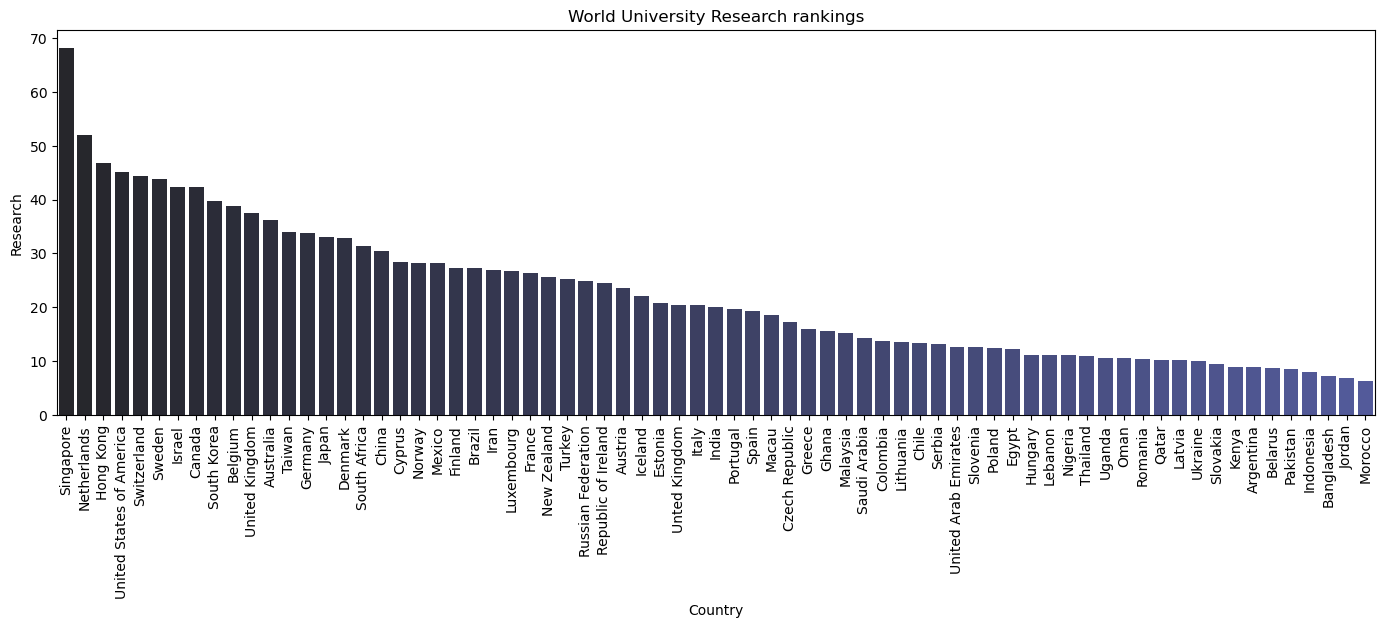

In [21]:
plt.figure(figsize = (17, 5))
sns.barplot(x = sorted_df['country'] , y = sorted_df['research'], palette = sns.dark_palette("#4751a6", len(sorted_df)))
plt.xticks(rotation = 90)
plt.title("World University Research rankings")
plt.xlabel("Country")
plt.ylabel("Research")
plt.show()

In [22]:
teaching_rate = [] # по стране
for c in list_of_country:
    each_country = df[df["country"] == c]
    teaching_ratio = sum(each_country.teaching) / len(each_country)
    teaching_rate.append(teaching_ratio)

In [23]:
teaching_rate

[47.944309559939285,
 37.170666666666655,
 45.172340425531935,
 39.00740740740743,
 42.58235294117647,
 40.838775510204115,
 42.21754385964912,
 56.5,
 31.852136752136758,
 38.78915662650601,
 35.591780821917794,
 35.7157894736842,
 39.3032894736842,
 28.6741935483871,
 28.653125,
 30.161403508771926,
 27.234999999999996,
 27.17575757575758,
 40.970666666666666,
 35.62972972972973,
 31.079310344827576,
 29.785714285714285,
 24.88947368421052,
 22.996666666666666,
 21.3,
 30.535483870967745,
 38.757894736842104,
 36.308,
 25.396808510638284,
 39.114999999999995,
 18.354545454545455,
 13.14,
 23.9,
 32.33,
 20.692307692307693,
 27.299999999999997,
 22.783333333333328,
 19.28181818181818,
 19.5625,
 19.36,
 21.433333333333334,
 32.53333333333333,
 17.32,
 17.8,
 16.85,
 25.0,
 18.0,
 18.4,
 15.1,
 23.6,
 27.7,
 25.799999999999997,
 21.0,
 19.65,
 19.166666666666668,
 15.600000000000001,
 20.2,
 20.4,
 23.15,
 21.7,
 15.6,
 22.7,
 18.1,
 17.7,
 22.6,
 13.7,
 16.0,
 9.9,
 21.3,
 24.79999999

In [24]:
df_new2 = pd.DataFrame({"country": list_of_country , "teaching": teaching_rate }) 
sorted_df2 = df_new2.reindex(df_new2["teaching"].sort_values(ascending= False).index)
sorted_df2

,country,teaching
7,Singapore,56.500000
0,United States of America,47.944310
2,Switzerland,45.172340
4,Hong Kong,42.582353
6,South Korea,42.217544
...,...,...
60,Ghana,15.600000
48,Uganda,15.100000
65,Kenya,13.700000
31,Iceland,13.140000


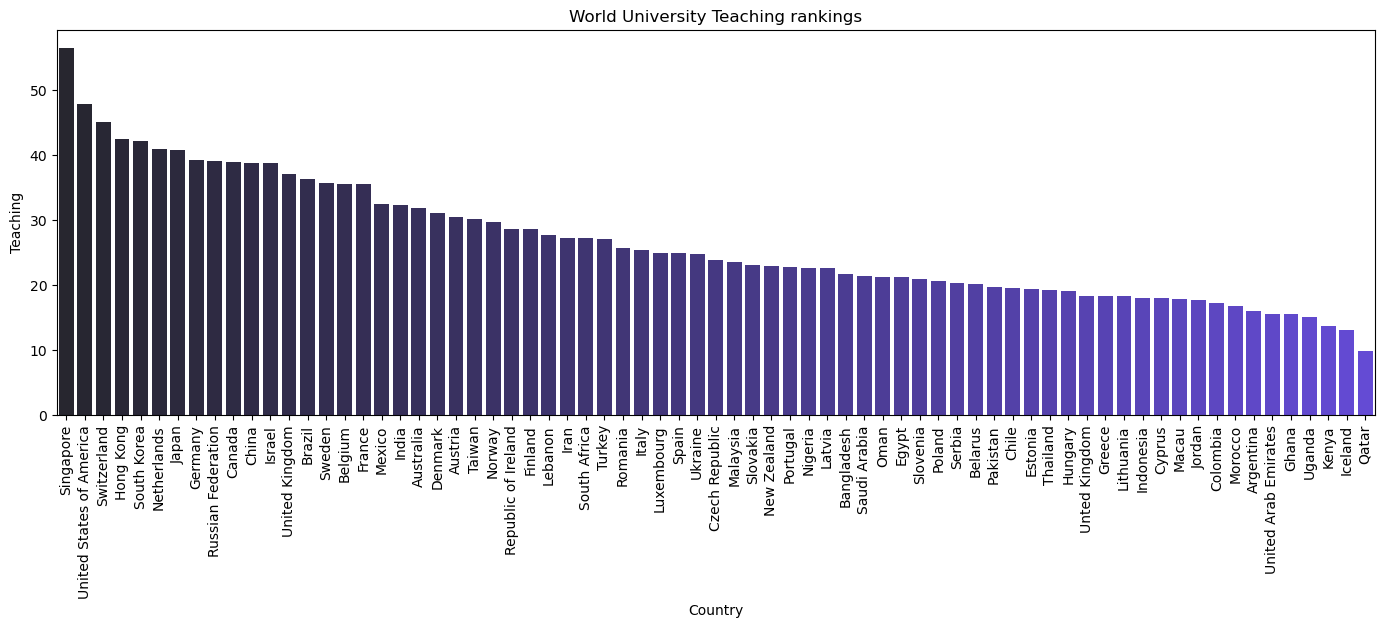

In [25]:
plt.figure(figsize = (17, 5))
sns.barplot(x = sorted_df2['country'] , y = sorted_df2['teaching'], palette = sns.dark_palette("#5534eb", len(sorted_df2)))
plt.xticks(rotation = 90)
plt.title("World University Teaching rankings")
plt.xlabel("Country")
plt.ylabel("Teaching")
plt.show()

Text(0.5, 1.0, 'Teaching & Research ')

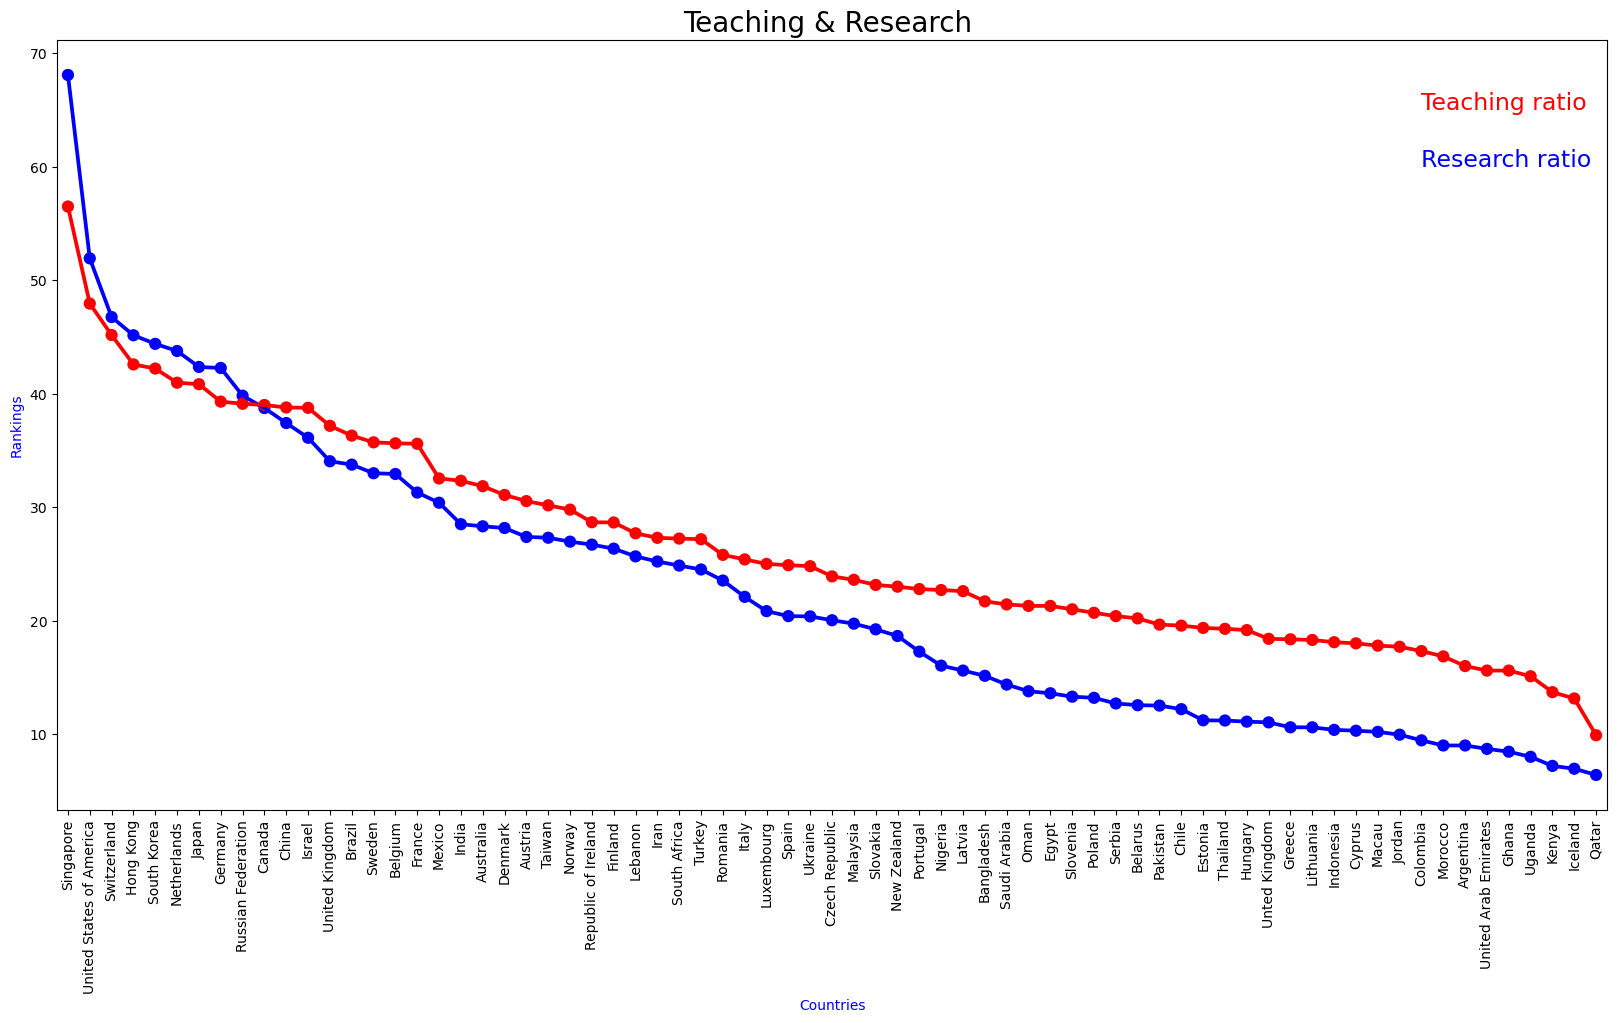

In [96]:
plt.subplots(figsize = (20,10))
sns.pointplot(x = "country" , y = "research" , data = sorted_df , color = "blue")
sns.pointplot(x = "country" , y = "teaching" , data = sorted_df2 , color = "red")
plt.text(62,65,'Teaching ratio', color='red', fontsize = 17)
plt.text(62,60,'Research ratio', color='blue', fontsize = 17)
plt.xlabel('Countries',color='blue')
plt.ylabel('Rankings', color='blue')
plt.xticks(rotation = 90)
plt.title('Teaching & Research ', fontsize = 20, color = 'black')

<font size = 5>Выводы</font>:

Были предоставлены данные собранные в промежутке 2011 - 2016 годов. Можно заметить, что с течением времени увеличилось количество университетов принимаемых участие в исследовании.<br/><br/> 
В результате исследования были сформированы усредненые показатели за все время для оценок университетов по результатам исследования и университетского балла преподавания, в разрезе стран.<br/><br/>
Можно обратить внимание, что в лидерах по этим двум показателям находятся Сингапур, США, Щвейцария - что свидетельствует о высоком качестве подготовки студентов. В то время как наиболее отстающими считаются Катар, Исландия, Кения.

<font size = 5> 
<font>Создаем выборки</font>

1. Случайная выборка

In [27]:
df1 = df.sort_values(by = ['university_name']).reset_index(drop = True)
train_dataset = df1.sample(frac = 0.6)

print(f'shape train dataset {train_dataset.shape}')
train_dataset.describe()

shape train dataset (1562, 14)


,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,37.629513,51.850064,35.843662,60.864213,48.561844,23756.069142,18.221767,2.145948,2014.071703
std,17.044431,21.852438,20.845221,23.038243,20.262327,15787.252720,10.605095,9.967871,1.698997
min,9.900000,7.700000,3.700000,3.000000,24.200000,462.000000,2.500000,0.010000,2011.000000
25%,24.925000,33.400000,19.900000,45.625000,33.500000,12808.250000,12.100000,0.080000,2013.000000
50%,34.000000,50.300000,30.800000,62.800000,42.800000,21426.000000,16.400000,0.140000,2014.000000
75%,46.500000,67.300000,47.075000,78.875000,55.475000,29885.000000,20.700000,0.220000,2016.000000
max,98.300000,99.900000,99.300000,100.000000,100.000000,197102.000000,108.500000,52.000000,2016.000000


2. Выборка через train_test_split

In [28]:
from sklearn.model_selection import train_test_split

df2 = df.copy(deep = True)
train, test = train_test_split(df2, train_size = 0.6)

print(f'shape train dataset {train.shape}')
train.describe()

shape train dataset (1561, 14)


,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year
count,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000
mean,38.310698,51.707431,36.318322,61.132543,48.955477,23949.519539,18.295644,1.849609,2014.063421
std,17.939335,21.974701,21.588747,23.667680,20.467047,18726.097393,11.550607,9.220135,1.688711
min,9.900000,7.100000,3.700000,3.000000,24.200000,462.000000,1.100000,0.010000,2011.000000
25%,25.100000,33.300000,19.400000,45.100000,33.900000,12646.000000,12.000000,0.080000,2013.000000
50%,34.400000,50.000000,31.300000,62.800000,43.000000,21379.000000,16.100000,0.140000,2014.000000
75%,47.200000,68.700000,48.000000,80.400000,56.900000,29787.000000,20.700000,0.230000,2016.000000
max,98.300000,100.000000,99.400000,100.000000,100.000000,379231.000000,162.600000,52.000000,2016.000000


3. Выборка через np.random.rand

In [29]:
df3 = df.copy(deep = True)

msk = np.random.rand(len(df3)) < 0.60
train_df = df[msk]

print(f'shape train dataset {train_df.shape}')
train_df.describe()

shape train dataset (1565, 14)


,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,38.081150,51.277061,36.027796,60.631629,48.042045,23530.716294,18.213035,2.074249,2014.100319
std,17.759881,21.974155,21.344478,23.100570,19.867330,15610.829726,10.829048,9.798157,1.690815
min,9.900000,7.100000,2.900000,1.200000,24.200000,462.000000,0.600000,0.010000,2011.000000
25%,24.700000,32.900000,19.400000,45.500000,33.500000,12646.000000,12.000000,0.080000,2013.000000
50%,34.200000,49.200000,30.900000,62.200000,42.500000,21394.000000,16.200000,0.140000,2014.000000
75%,47.500000,67.600000,47.600000,78.900000,53.700000,29787.000000,20.700000,0.220000,2016.000000
max,98.300000,99.900000,99.400000,100.000000,100.000000,231941.000000,88.900000,52.000000,2016.000000


4. Выборка строк четных

In [30]:
df4 = df.copy(deep = True)
df4  = df4[::2] # четные

print(f'shape train dataset {df4.shape}')
df4.describe()

shape train dataset (1302, 14)


,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,year
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,37.678725,52.045161,35.887404,61.190553,48.604455,24077.788018,18.434485,1.586874,2014.076037
std,17.606588,22.043439,21.293344,23.174367,20.198684,17587.341823,11.163175,8.505046,1.685830
min,9.900000,7.200000,2.900000,1.200000,24.200000,462.000000,1.100000,0.010000,2011.000000
25%,24.500000,33.400000,19.725000,45.425000,33.900000,12613.000000,12.100000,0.080000,2013.000000
50%,34.000000,50.400000,30.600000,62.800000,42.800000,21228.000000,16.100000,0.130000,2014.000000
75%,45.875000,69.300000,46.775000,79.300000,55.700000,30025.000000,21.500000,0.220000,2016.000000
max,99.700000,99.900000,99.400000,100.000000,100.000000,231941.000000,108.500000,52.000000,2016.000000


In [31]:
from statistics import pvariance 
import statistics 
import math

Все дальнешие расчеты основаны на показателе research

In [32]:
mean_value_first = train.research.mean()
mean_value_second = train_dataset.research.mean()
mean_value_third = train_df.research.mean()
mean_value_fourth = df4.research.mean()

print(f'mean 1-s train dataset: {mean_value_first}')
print(f'mean 2-d train dataset: {mean_value_second}')
print(f'mean 3-d train dataset: {mean_value_third}')
print(f'mean 4-h train dataset: {mean_value_fourth}')

mean 1-s train dataset: 36.318321588725176
mean 2-d train dataset: 35.84366197183099
mean 3-d train dataset: 36.02779552715655
mean 4-h train dataset: 35.8874039938556


In [33]:
median_first = statistics.median(train.research)
median_second = statistics.median(train_dataset.research)
median_third = statistics.median(train_df.research)
median_fourth = statistics.median(df4.research)

print(f'median 1-s train dataset: {median_first}')
print(f'median 2-d train dataset: {median_second}')
print(f'median 3-d train dataset: {median_third}')
print(f'median 4-h train dataset: {median_fourth}')

median 1-s train dataset: 31.3
median 2-d train dataset: 30.8
median 3-d train dataset: 30.9
median 4-h train dataset: 30.6


In [34]:
R_first = train.research.max() - train.research.min() # размах
R_second = train_dataset.research.max() - train_dataset.research.min()
R_third = train_df.research.max() - train_df.research.min()
R_fourth = df4.research.max() - df4.research.min()

print(f'scale 1-s train dataset: {R_first}')
print(f'scale 2-d train dataset: {R_second}')
print(f'scale 3-d train dataset: {R_third}')
print(f'scale 4-h train dataset: {R_fourth}')

scale 1-s train dataset: 95.7
scale 2-d train dataset: 95.6
scale 3-d train dataset: 96.5
scale 4-h train dataset: 96.5


In [35]:
d_2_first = pvariance(train.research) #дисперсия
d_2_second = pvariance(train_dataset.research)
d_2_third = pvariance(train_df.research)
d_2_fourth = pvariance(df4.research)

print(f'dispersion 1-s train dataset: {d_2_first}')
print(f'dispersion 2-d train dataset: {d_2_second}')
print(f'dispersion 3-d train dataset: {d_2_third}')
print(f'dispersion 4-h train dataset: {d_2_fourth}')

dispersion 1-s train dataset: 465.7754234481502
dispersion 2-d train dataset: 434.2450718652504
dispersion 3-d train dataset: 455.2956427441334
dispersion 4-h train dataset: 453.0582437983865


In [36]:
q_first = math.sqrt(d_2_first) # ско
q_second = math.sqrt(d_2_second)
q_third = math.sqrt(d_2_third)
q_fourth = math.sqrt(d_2_fourth)

print(f'Standard deviation in the 1-s train dataset: {q_first}')
print(f'Standard deviation in the 2-d train dataset: {q_second}')
print(f'Standard deviation in the 3-d train dataset: {q_third}')
print(f'Standard deviation in the 4-h train dataset: {q_fourth}')

Standard deviation in the 1-s train dataset: 21.581830864135465
Standard deviation in the 2-d train dataset: 20.838547738872073
Standard deviation in the 3-d train dataset: 21.337657855166142
Standard deviation in the 4-h train dataset: 21.28516487599724


In [37]:
V_first = q_first / median_first # Коэффициент вариации
V_second = q_second / median_second
V_third = q_third / median_third
V_fourth = q_fourth / median_fourth

print(f'coefficient of variation 1-s train dataset: {V_first}')
print(f'coefficient of variation 2-d train dataset: {V_second}')
print(f'coefficient of variation 3-d train dataset: {V_third}')
print(f'coefficient of variation 4-h train dataset: {V_fourth}') # выборка неоднородная

coefficient of variation 1-s train dataset: 0.6895153630714206
coefficient of variation 2-d train dataset: 0.6765762252880543
coefficient of variation 3-d train dataset: 0.6905390891639529
coefficient of variation 4-h train dataset: 0.6955936233986025


In [38]:
# коэффициент осцилляции – отражает относительное колебание крайних значений в выборке вокруг средней
K_first = R_first / median_first
K_second = R_second / median_second
K_third = R_third / median_third
K_fourth = R_fourth / median_fourth

print(f'coefficient of oscillation 1-s train dataset: {K_first}')
print(f'coefficient of oscillation 2-d train dataset: {K_second}')
print(f'coefficient of oscillation 3-d train dataset: {K_third}')
print(f'coefficient of oscillation 4-h train dataset: {K_fourth}')

coefficient of oscillation 1-s train dataset: 3.0575079872204474
coefficient of oscillation 2-d train dataset: 3.1038961038961035
coefficient of oscillation 3-d train dataset: 3.1229773462783172
coefficient of oscillation 4-h train dataset: 3.15359477124183


In [39]:
trust_diaposon_first = [median_first - q_first, median_first + q_first]
trust_diaposon_second = [median_second - q_second, median_second + q_second]
trust_diaposon_third = [median_third - q_third, median_third + q_third]
trust_diaposon_fourth = [median_fourth - q_fourth, median_fourth + q_fourth]

print(f'trust diaposon 1-s train dataset: {trust_diaposon_first}')
print(f'trust diaposon 2-d train dataset: {trust_diaposon_second}')
print(f'trust diaposon 3-d train dataset: {trust_diaposon_third}')
print(f'trust diaposon 4-h train dataset: {trust_diaposon_fourth}')

trust diaposon 1-s train dataset: [9.718169135864535, 52.881830864135466]
trust diaposon 2-d train dataset: [9.961452261127928, 51.63854773887208]
trust diaposon 3-d train dataset: [9.562342144833856, 52.23765785516614]
trust diaposon 4-h train dataset: [9.314835124002762, 51.88516487599724]
